<a href="https://colab.research.google.com/github/Atikuzzaman101/Statistics-and-Trends/blob/main/Statistics_and_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied Data Science 1**

Statistics and Trends (20%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
file_path = '/content/Admission_Predict.csv'
df = pd.read_csv(file_path)

In [18]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Actual,Predicted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1,1


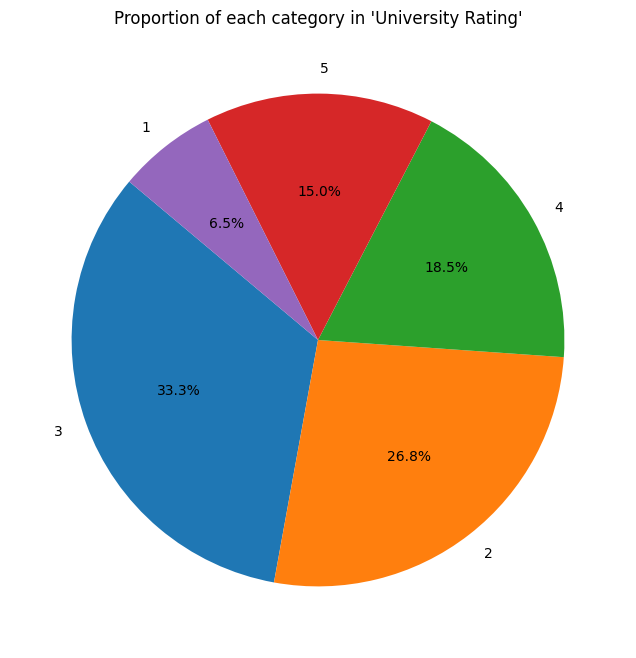

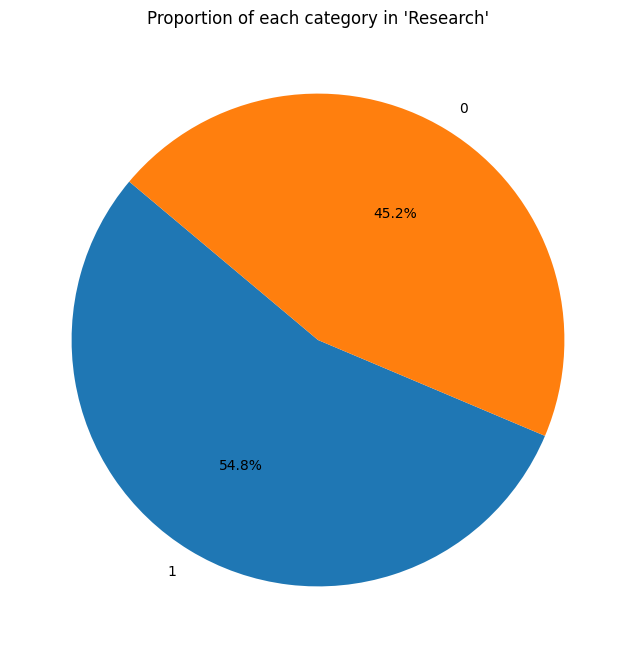

In [4]:
def plot_pie_chart(data, column):

    # Calculate value counts for the column
    counts = data[column].value_counts()

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion of each category in '{column}'")
    plt.show()

# Example usage
plot_pie_chart(df, "University Rating")
plot_pie_chart(df, "Research")


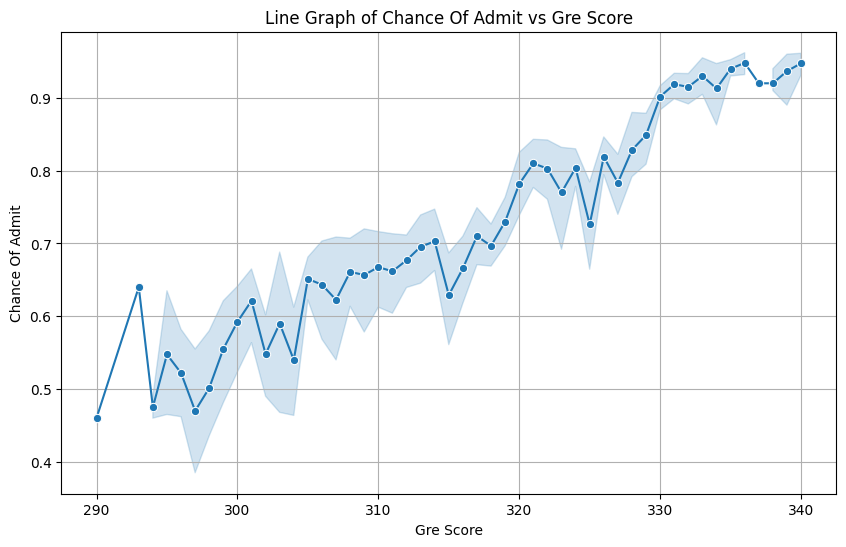

In [12]:
def plot_line_graph(data, x_column, y_column):

    plt.figure(figsize=(10, 6))

    # Plot the line graph
    sns.lineplot(data=data, x=x_column, y=y_column, marker='o')

    # Title and labels
    plt.title(f"Line Graph of {y_column.replace('_', ' ').title()} vs {x_column.replace('_', ' ').title()}")
    plt.xlabel(x_column.replace("_", " ").title())
    plt.ylabel(y_column.replace("_", " ").title())
    plt.grid()
    plt.show()

# Example usage
plot_line_graph(df, "GRE Score", "Chance of Admit")


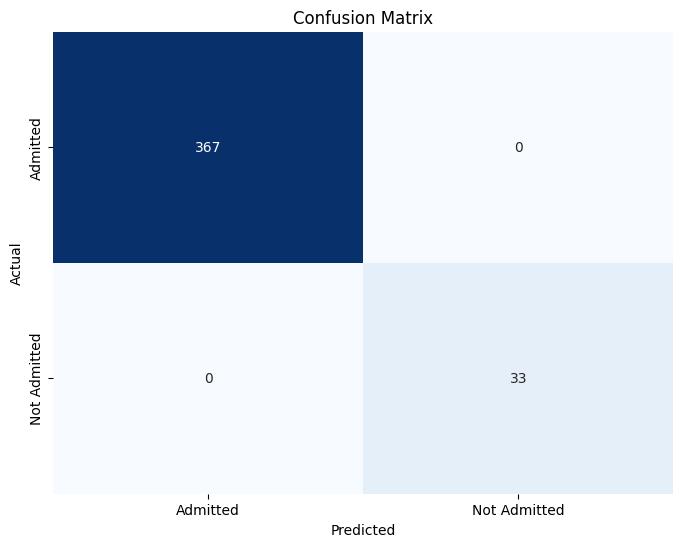

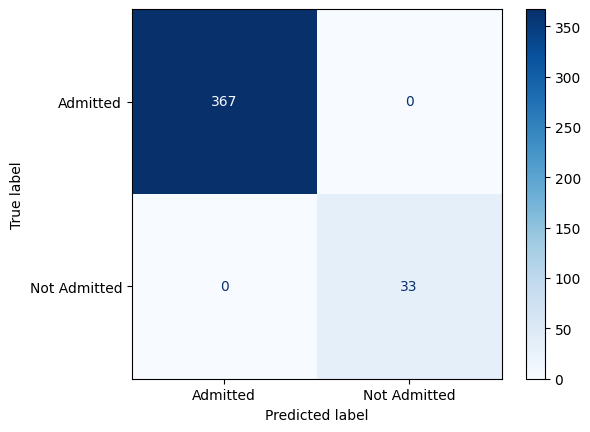

In [14]:
# Ensure no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Define a threshold for classification
threshold = 0.5

# Create actual and predicted labels
# Convert Chance of Admit to binary outcome
df['Actual'] = np.where(df['Chance of Admit'] >= threshold, 1, 0)

# For the sake of this example, we'll assume we have a model that makes predictions.
# Here we will use 'Actual' as both the predicted and actual for demonstration purposes.
# In a real scenario, replace `df['Predicted']` with your model's predictions.
df['Predicted'] = df['Actual']  # Placeholder: replace with actual model predictions

# Create the confusion matrix
cm = confusion_matrix(df['Actual'], df['Predicted'], labels=[1, 0])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Admitted', 'Not Admitted'],
            yticklabels=['Admitted', 'Not Admitted'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the confusion matrix using sklearn's utility
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Admitted', 'Not Admitted'])
cmd.plot(cmap='Blues')
plt.show()
